# Street network analysis

Graph analysis offers three modes, of which the first two are used within `momepy` (as per v0.2):
- node-based
    - value per node
- edge-based
    - value per edge
- network-based
    - single value per network

In [1]:
import momepy
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

In this notebook, we will look at Písek, Czechia. We retrieve its network from OSM and convert it to GeoDataFrame:

In [2]:
streets_graph = ox.graph_from_place('Pisek, Czechia', network_type='drive')
streets_graph = ox.projection.project_graph(streets_graph)

streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

**Note:** See the detailed explanation of these steps in the [centrality notebook](centrality.ipynb).

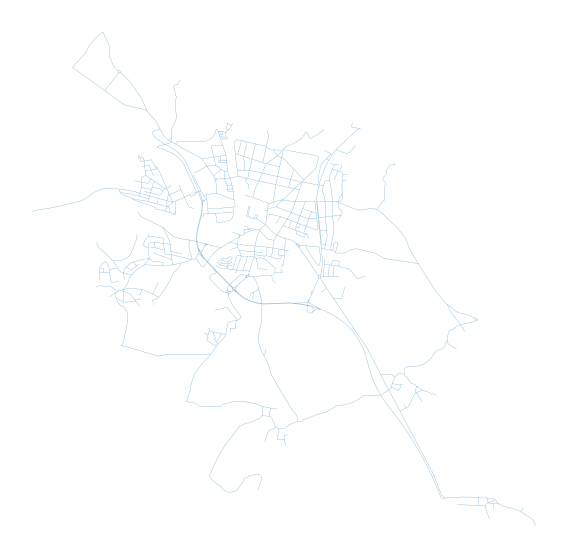

In [3]:
f, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

We can generate networkX.MultiGraph, which is used within momepy for network analysis, using `gdf_to_nx`.

In [4]:
graph = momepy.gdf_to_nx(streets)

## Node-based analysis

Once we have the graph, we can use momepy functions, like the one measuring clustering:

In [5]:
graph = momepy.clustering(graph, name='clustering')

### Using sub-graph

Momepy includes local characters measured on the network within a certain radius from each node, like meshedness. The function will generate `ego_graph` for each node so that it might take a while for more extensive networks. Radius can be defined topologically:

In [6]:
graph = momepy.meshedness(graph, radius=5, name='meshedness')

100%|██████████| 557/557 [00:00<00:00, 774.73it/s]


Or metrically, using distance which has been saved as an edge argument by `gdf_to_nx` (or any other weight).

In [7]:
graph = momepy.meshedness(graph, radius=400, name='meshedness400',
                          distance='mm_len')

100%|██████████| 557/557 [00:00<00:00, 1662.95it/s]


Once we have finished the graph-based analysis, we can go back to `GeoPandas`. In this notebook, we are interested in nodes only:

In [8]:
nodes = momepy.nx_to_gdf(graph, points=True, lines=False, spatial_weights=False)

Now we can plot our results in a standard way, or link them to other elements (using `get_node_id`).

Clustering:

/opt/miniconda3/envs/test/lib/python3.8/site-packages/mapclassify/classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/miniconda3/envs/test/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


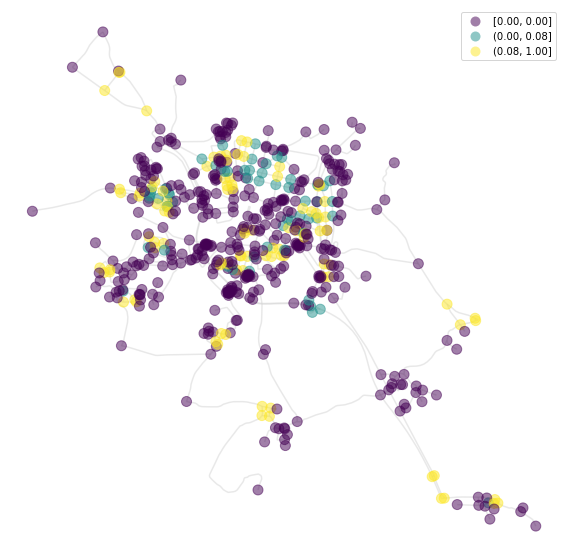

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='clustering', markersize=100, legend=True, cmap='viridis',
           scheme='quantiles', alpha=0.5, zorder=2)
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

Meshedness based on topological distance:

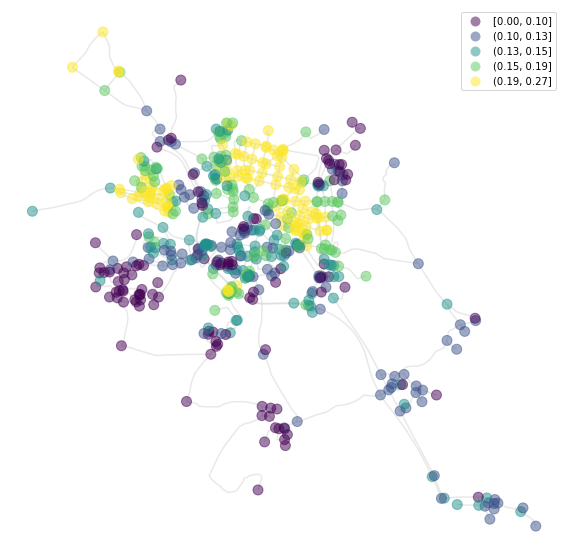

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='meshedness', markersize=100, legend=True, cmap='viridis',
           alpha=0.5, zorder=2, scheme='quantiles')
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

And meshedness based on 400 metres:

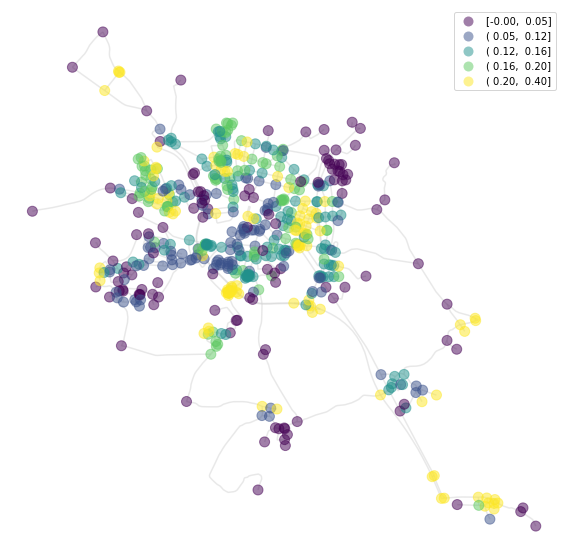

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='meshedness400', markersize=100, legend=True, cmap='viridis',
           alpha=0.5, zorder=2, scheme='quantiles')
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()